# Australia Office

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [13]:
df_bo1h = pd.read_csv('D:/payday/train_public/1h/L09.B01_1H.csv')
df_bo1min15 = pd.read_csv('D:/payday/train_public/15min/L09.B01_15min.csv')

In [14]:
df_bo1h.describe()

,main_meter(kW),PV_battery_system(kW)
count,8287.000000,8287.000000
mean,76.049559,58.886436
std,72.484767,80.279520
min,-218.692308,-79.333333
25%,32.708333,-2.000000
50%,93.416667,15.000000
75%,108.166667,119.833333
max,463.416667,329.583333


In [15]:
df_bo1min15
'''
PV_battery_system refers to the power measurements for photovoltaics and batteries combined.
Negative values in the main meter mean that the building is feeding electricity back to the power grid.
'''

'\nPV_battery_system refers to the power measurements for photovoltaics and batteries combined.\nNegative values in the main meter mean that the building is feeding electricity back to the power grid.\n'

In [16]:
df_bo1h

,timestamp,main_meter(kW),PV_battery_system(kW)
0,2021-01-01 00:00:00+00:00,70.000000,15.000000
1,2021-01-01 01:00:00+00:00,74.083333,15.000000
2,2021-01-01 02:00:00+00:00,77.416667,15.000000
3,2021-01-01 03:00:00+00:00,76.916667,15.000000
4,2021-01-01 04:00:00+00:00,79.833333,15.000000
...,...,...,...
8282,2021-12-31 19:00:00+00:00,62.250000,12.083333
8283,2021-12-31 20:00:00+00:00,15.833333,60.666667
8284,2021-12-31 21:00:00+00:00,-21.833333,97.666667
8285,2021-12-31 22:00:00+00:00,-2.000000,82.666667


In [17]:
df_weather_Lo9 = pd.read_csv('D:/payday/train_public/weather/L09_weather_train.csv')

In [18]:
date_data = '2021-04-01'

if the temperature and the power comsumption graph is inverse, like above, then heater is on.
the temperature is lowe, and the power graph is higher implies the heater is on.

Similarly, if the temperature graph is higher, and the power consumption grpah is higher too, then it implies that the chiller is on.

1H ---> mainly for heater and cooler, since the assumption being that the chiller/heater works on a hourly basis
15min --->  mainly for appliances which are used once/twise, lets say a washing machine.


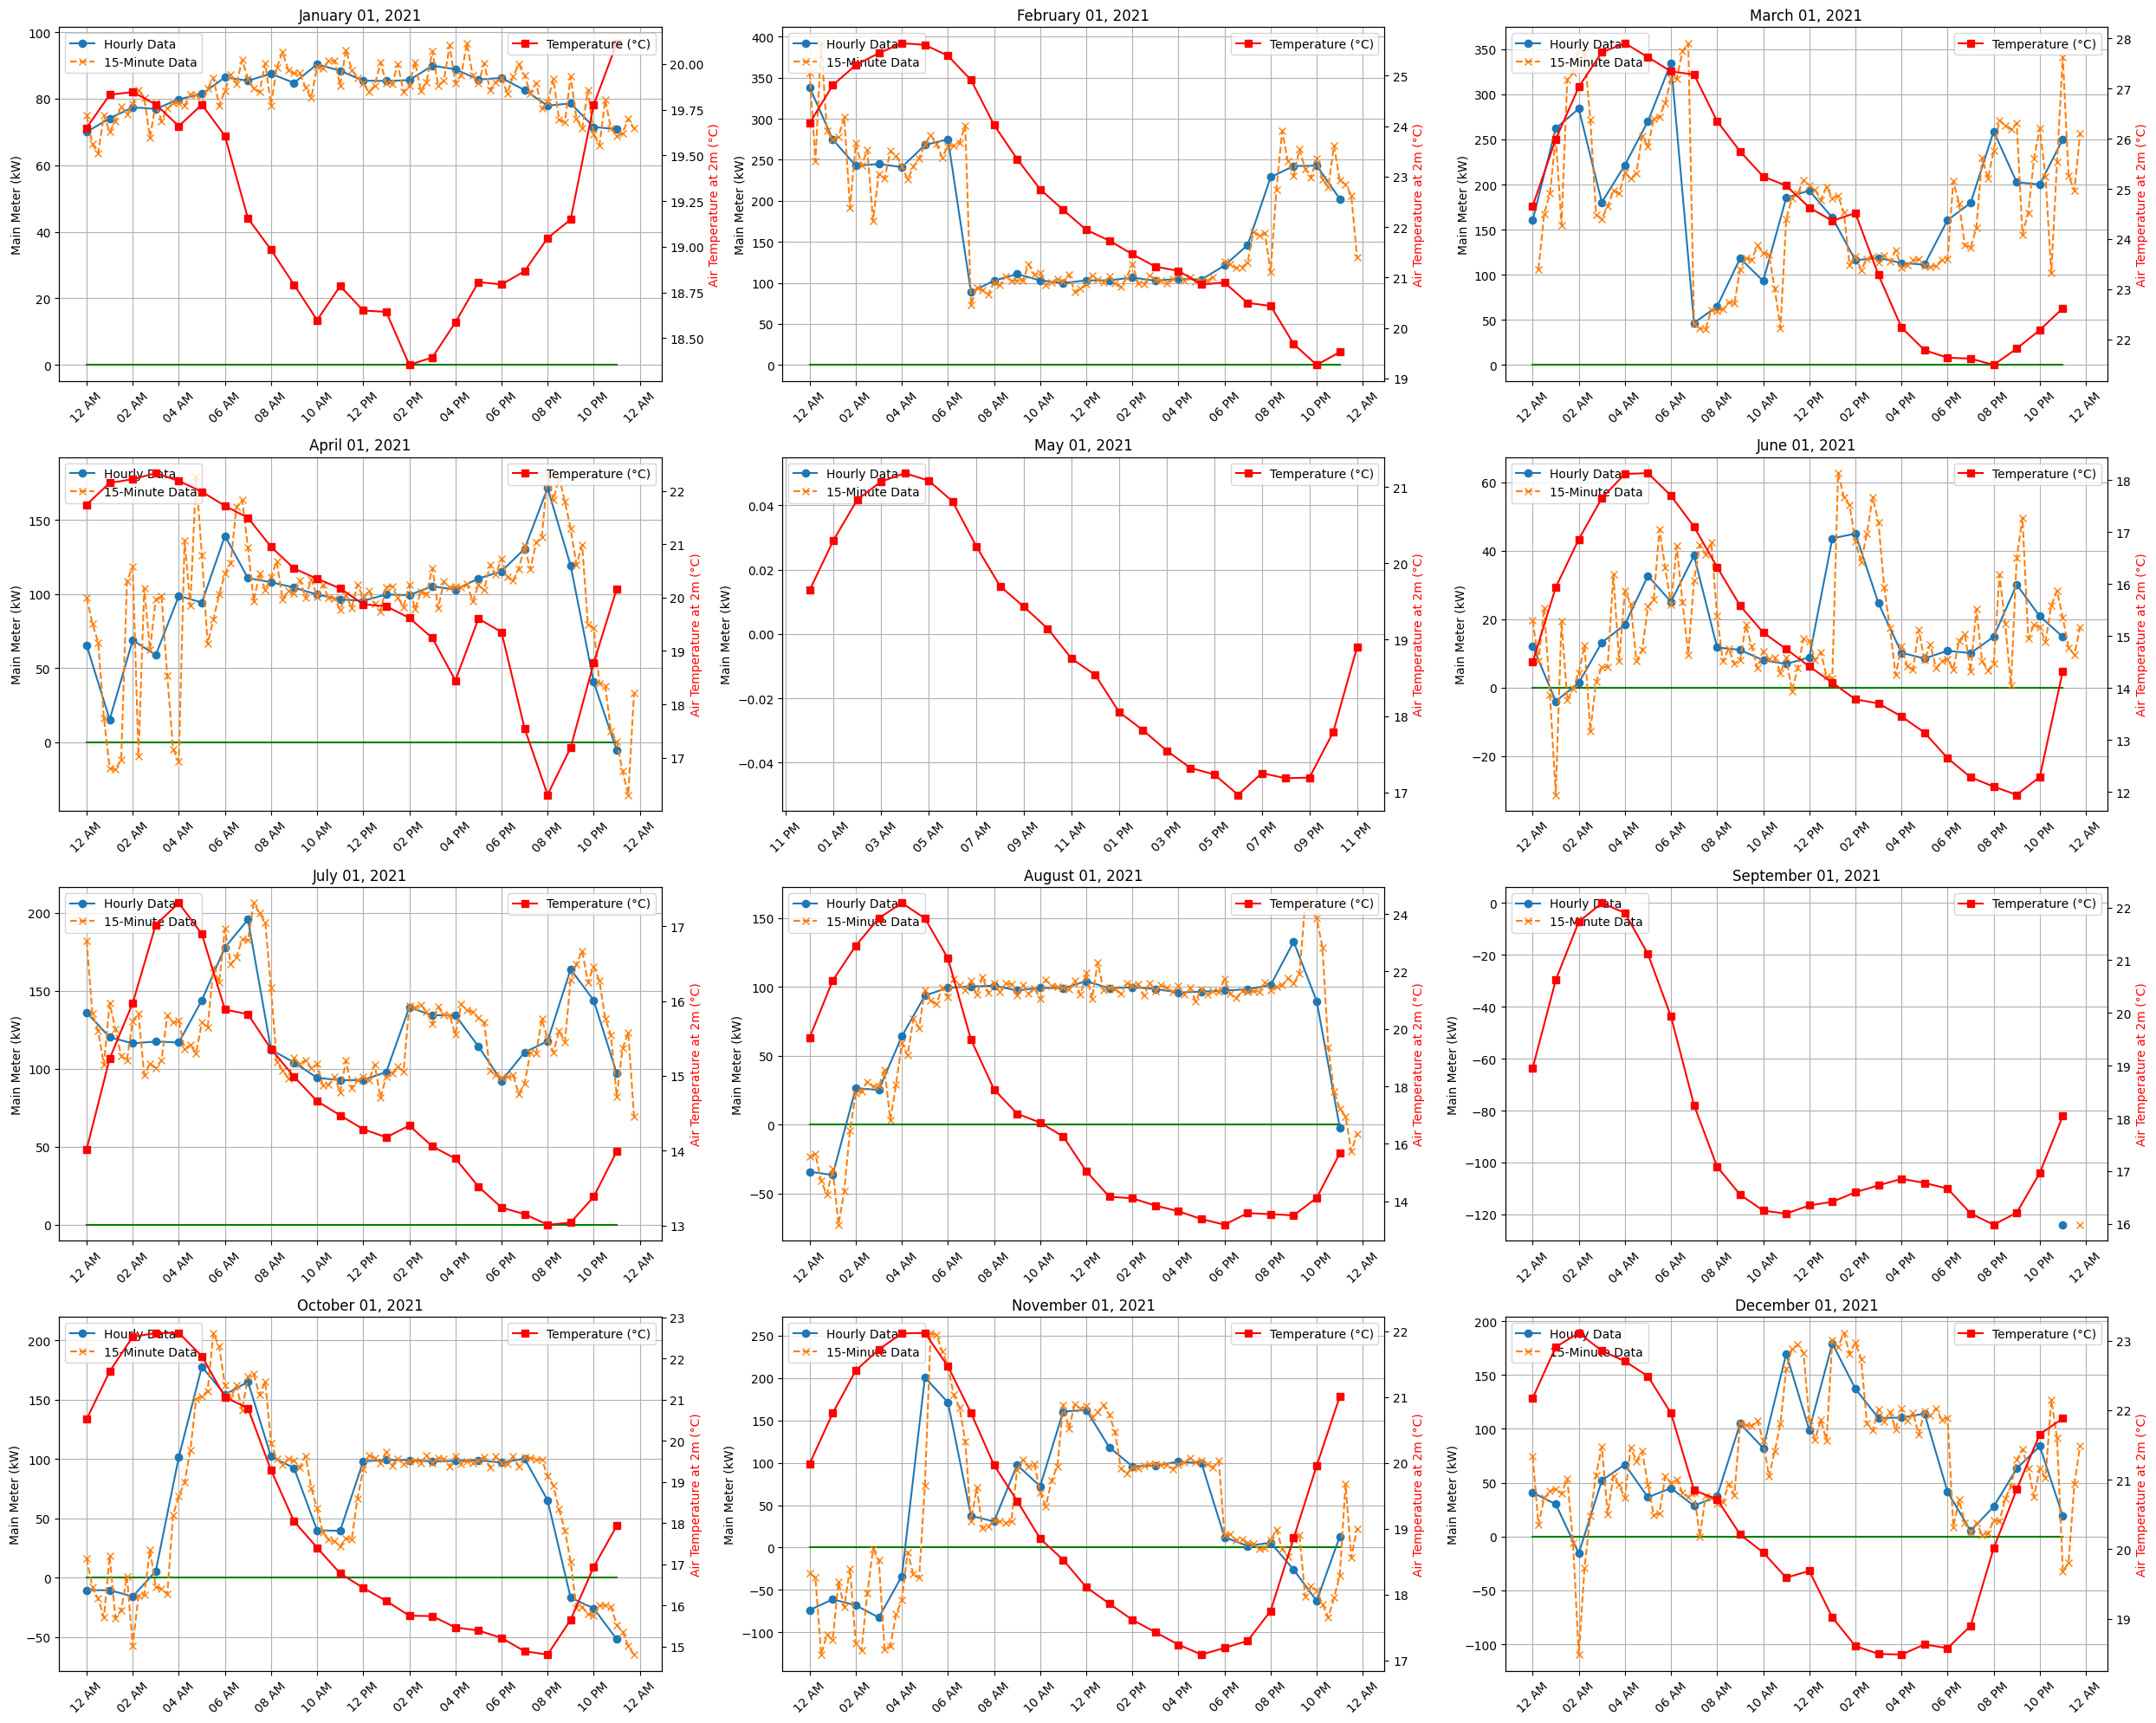

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_bo1h, df_bo1min15, and df_weather_Lo9 are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_bo1h['timestamp'] = pd.to_datetime(df_bo1h['timestamp'])
df_bo1min15['timestamp'] = pd.to_datetime(df_bo1min15['timestamp'])
df_weather_Lo9['timestamp'] = pd.to_datetime(df_weather_Lo9['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2021-01-01', end='2021-12-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_bo1h[df_bo1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_15min = df_bo1min15[df_bo1min15['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather_Lo9[df_weather_Lo9['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'],[0]*len(one_day_hourly['main_meter(kW)']),color = 'green')
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
    axes[i].plot(one_day_15min['timestamp'], one_day_15min['main_meter(kW)'], marker='x', label='15-Minute Data', linestyle='--')
    axes[i].set_ylabel('Main Meter (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot weather data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
    ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:

    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()